<a href="https://colab.research.google.com/github/HienNguyenMinh/PythonAssignment/blob/main/BaiTap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M5 EDA - Vẽ Các Biểu Đồ

**Tải các tệp dữ liệu từ Google Drive về Colab**

In [185]:
#Install gdown
!pip uninstall gdown -y && pip install gdown
#Tạo một folder "DataSet" trên Colab
!rm -rf /content/M5Forecasting
!mkdir M5Forecasting
#Tải các tệp dữ liệu lớn từ Google Drive
!gdown --folder https://drive.google.com/drive/folders/1YgxRFChKTJ5EHStqR_dNvJCd_2HibWll?usp=sharing -O /content/M5Forecasting


Found existing installation: gdown 4.5.3
Uninstalling gdown-4.5.3:
  Successfully uninstalled gdown-4.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gdown-4.5.3-py3-none-any.whl
Retrieving folder list
Processing file 1nJoIt6-nl7YOgqusRLxUZTFgOa1EmsW0 calendar.csv
Processing file 1cuEGsxjYBISrMMq8d52um_MzGTZcqyTq sales_train_evaluation.csv
Processing file 1swX4_vKU7hl6wmLQjod_EUFf3ztNgdq2 sales_train_validation.csv
Processing file 1GCf2ElYJR4Z6tBFD1BbhrvQE75wvwB1Y sample_submission.csv
Processing file 1WVPd8CnbqF65IBT2gBxLBk4yyCiJ8Psg sell_prices.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1nJoIt6-nl7YOgqusRLxUZTFgOa1EmsW0
To: /content/M5Forecasting/calendar.csv
100% 103k/103k [00:00<00:00, 88.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cuEGsxjYBISrMMq8d52um_MzGTZcqyTq
To: /content/M5Foreca

In [186]:
# Import các thư viện cần thiết
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Kiểm tra các file dữ liệu *.csv được tải về Colab thông qua việc duyệt cây thư mục vừa được tải về Colab và in ra đường dẫn các file dữ liệu:
import os
for dirname, _, filenames in os.walk('/content/M5Forecasting'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/M5Forecasting/sales_train_validation.csv
/content/M5Forecasting/sell_prices.csv
/content/M5Forecasting/sample_submission.csv
/content/M5Forecasting/calendar.csv
/content/M5Forecasting/sales_train_evaluation.csv


In [187]:
#Đọc dữ liệu từ các file *.csv
sale2 = pd.read_csv('/content/M5Forecasting/sales_train_validation.csv')
cale4 = pd.read_csv('/content/M5Forecasting/calendar.csv')
prices = pd.read_csv('/content/M5Forecasting/sell_prices.csv')

In [188]:
#In 3 dòng dữ liệu đầu tiên trong dataframe
sale2.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1


**Đổi tên các cột của sale2 (sales_train_validation)**

Tên cột d_* đổi về ngày tương ứng


In [189]:
import datetime
#Bắt đầu từ ngày 29/1/2011
x = datetime.date(2011,1,29)
#Lặp qua các cột bắt đầu từ cột thứ 6 (d_1)
for c in ((sale2.columns)[6:]):
    #Rename cột với tên lấy từ x
    sale2.rename(columns={c:x},inplace=True)
    #Tăng lên 1 ngày cho để dùng cho cột kế tiếp
    x = x + datetime.timedelta(days=1)

#In 5 dòng dữ liệu đầu tiên
sale2.head()

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


**Doanh số bán hàng của 5 item đầu tiên theo time series**

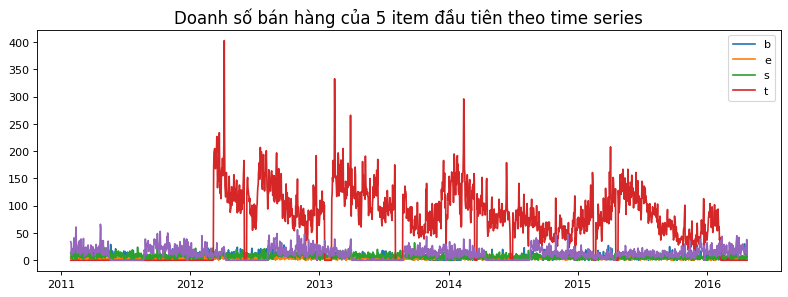

In [190]:
#Dataframe sale2: nhóm theo cột 'item_id', tính tổng doanh số hàng ngày từ cột[6] trở đến cột cuối
#Tạo dataframe sale2_temp, lấy dữ liệu đã tính toán của sale2 đổ vào sale2_temp
sale2_temp = sale2.groupby('item_id')[(sale2.columns)[6:]].sum()
#Tạo dataframe sale2_5first, lấy 5 dòng dữ liệu đầu tiên của sale2_temp
sale2_5first = sale2_temp[:5]

#Vẽ biểu đồ biểu diễn doanh số bán hàng của 5 item đầu tiên theo time series
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
#Lặp từ 0 đến 5 (len(sale2_temp.index) = 5)
for i in range(len(sale2_5first.index)):
    x = sale2_5first.iloc[i,:]
    label=sale2_5first.index[i]
    plt.plot(x,label = label)    
    plt.legend('best')
plt.title('Doanh số bán hàng của 5 item đầu tiên theo time series', fontsize=15) 
plt.show()


**Tổng doanh số theo time series**

In [191]:
#In 5 dòng dữ liệu đầu tiên
sale2_temp.head()

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
item_id,,,,,,,,,,,,,,,,,,,,,
FOODS_1_001,6,6,4,6,7,18,10,4,11,10,...,4,4,30,7,5,3,6,2,16,6
FOODS_1_002,4,5,7,4,3,4,1,7,2,4,...,5,9,4,1,3,5,5,3,3,1
FOODS_1_003,14,8,3,6,3,8,13,10,11,6,...,7,3,5,6,3,4,4,3,11,5
FOODS_1_004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOODS_1_005,34,32,13,20,10,21,18,20,25,41,...,16,14,14,18,18,27,12,15,38,9


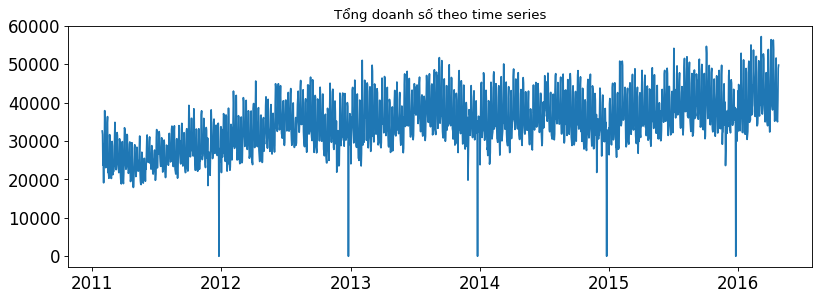

In [192]:
#Vẽ biểu đồ biểu diễn tổng doanh số theo time series
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
#Tính tổng doanh số mỗi ngày và vẽ biểu đồ
(sale2_temp.sum()).plot(title = 'Tổng doanh số theo time series', fontsize=15)
plt.show()

**Doanh số hàng tháng ở các tiểu bang khác nhau**

In [193]:
sale2_temp = sale2
#Nhóm các cột cùng tháng cùng năm và tính tổng doanh số của tháng
sale2_temp = sale2_temp.groupby(sale2_temp.columns.map(lambda x : x if type(x) == str else x.strftime('%Y-%m')),axis=1).sum()
for c in ((sale2_temp.columns)[:-6]):
    x= datetime.datetime.strptime(c, '%Y-%m').date()
    sale2_temp.rename(columns={c:x},inplace=True)

sale2_temp.head()    

,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,...,2016-01-01,2016-02-01,2016-03-01,2016-04-01,cat_id,dept_id,id,item_id,state_id,store_id
0,0,0,0,0,0,0,0,0,0,0,...,24,29,29,26,HOBBIES,HOBBIES_1,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,CA,CA_1
1,0,0,0,0,0,3,5,10,7,8,...,4,5,10,1,HOBBIES,HOBBIES_1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,CA,CA_1
2,0,0,0,0,0,0,0,0,0,0,...,6,9,15,16,HOBBIES,HOBBIES_1,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,CA,CA_1
3,0,0,17,23,34,28,60,55,53,55,...,64,60,53,51,HOBBIES,HOBBIES_1,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,CA,CA_1
4,0,0,0,0,31,31,5,36,67,26,...,22,33,39,29,HOBBIES,HOBBIES_1,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,CA,CA_1


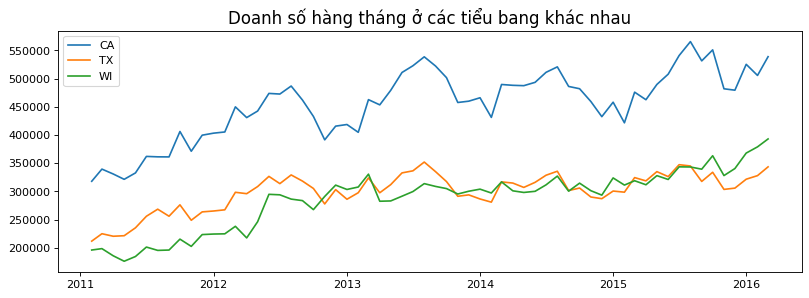

In [194]:
#Nhóm sale2_temp theo cột 'state_id', rồi tính tổng doanh số ở các cột từ cột đầu tiên và trừ 6 cột cuối
sale_City = sale2_temp.groupby(['state_id'])[(sale2_temp.columns)[:-6]].sum()
#Setting cho size, color của lưới biểu đồ
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ 
for i in range(3):
    x = sale_City.iloc[i,1:-1]
    label = label=sale_City.index[i]
    plt.plot(x, label= label)
    plt.legend(loc='best')
plt.title ('Doanh số hàng tháng ở các tiểu bang khác nhau', fontsize=15)
plt.show()


**Tổng doanh số hàng tháng theo các danh mục khác nhau**

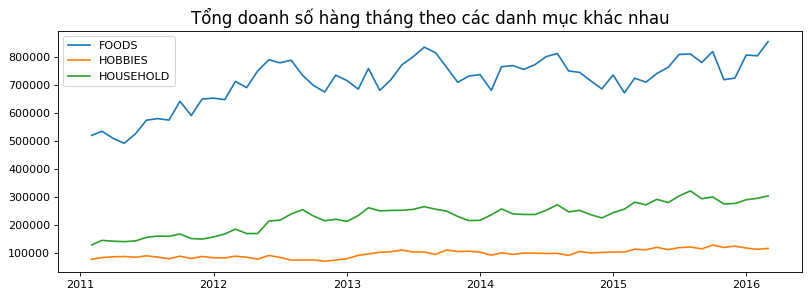

In [195]:
#Nhóm sale2_temp theo cột 'cat_id', rồi tính tổng doanh số ở các cột từ cột đầu tiên và trừ 6 cột cuối
sale_Cat = sale2_temp.groupby(['cat_id'])[(sale2_temp.columns)[:-6]].sum()
#Setting cho size, color của lưới biểu đồ
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ 
for i in range(3):
    x = sale_Cat.iloc[i,1:-1]
    label=sale_Cat.index[i]
    plt.plot(x, label = label)
    plt.legend(loc='best')
plt.title('Tổng doanh số hàng tháng theo các danh mục khác nhau', fontsize=15)
plt.show()

**Tổng doanh số theo từng danh mục**

In [196]:
#Nhóm sale2_temp theo cột 'cat_id', rồi tính tổng doanh số ở các cột từ cột đầu tiên và trừ 6 cột cuối
sale_Cat = sale2_temp.groupby(['cat_id'])[(sale2_temp.columns)[:-6]].sum()
sale_Cat = sale_Cat.sum(axis=1)
Totalsale_Cat = pd.DataFrame({'cat_id':sale_Cat.index, 'values':sale_Cat.values})
Totalsale_Cat

,cat_id,values
0,FOODS,45089939
1,HOBBIES,6124800
2,HOUSEHOLD,14480670


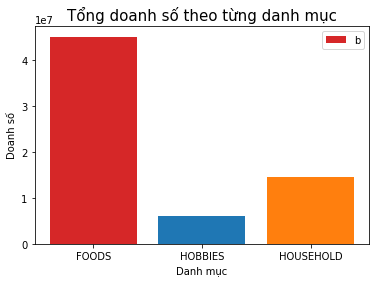

<Figure size 960x960 with 0 Axes>

In [197]:
#Vẽ lưới biểu đồ
fig, ax = plt.subplots()
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

#Vẽ biểu đồ dạng bar
x = Totalsale_Cat['cat_id']
y = Totalsale_Cat['values']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, color=bar_colors)

ax.set_xlabel('Danh mục')
ax.set_ylabel('Doanh số')
ax.set_title('Tổng doanh số theo từng danh mục', fontsize=15)
ax.legend('best')

plt.show()

**Doanh số hàng tháng ở các cửa hàng khác nhau**

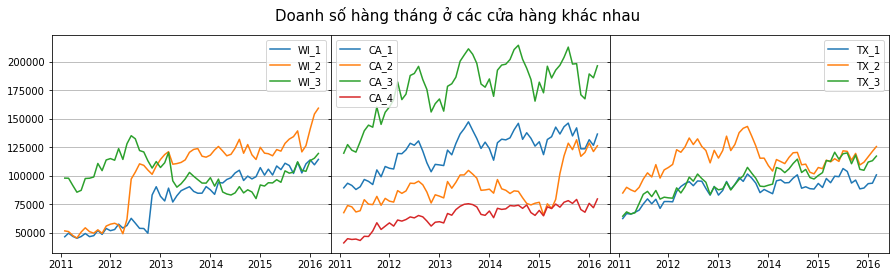

In [198]:
#Nhóm sale2_temp theo cột 'store_id', rồi tính tổng doanh số ở các cột từ cột đầu tiên và trừ 6 cột cuối
sale_Stores = sale2_temp.groupby(['store_id'])[(sale2_temp.columns)[:-6]].sum()
#Lưới biểu đồ có 1 dòng 3 cột
fig, ax = plt.subplots(1, 3, sharey=True, figsize = (15,4))
#Vẽ biểu đồ
for i in range(len(sale_Stores.index)):
    #If s =='W', n = 0
    #If s =='C', n = 1
    #Else n = 2
    n = lambda s : 0 if s == 'W' else (1 if s == 'C' else 2)
    #Giá trị lấy từ mỗi dòng ở cột index, rồi lấy ký tự đầu tiên
    n = n(sale_Stores.index[i][0])
    x = sale_Stores.iloc[i,1:-1]
    label = sale_Stores.index[i]
    ax[n].plot(x,label=label)
    ax[n].grid(b=True,axis='y')
    ax[n].legend(loc='best')    
fig.subplots_adjust( wspace=0.0)
plt.suptitle('Doanh số hàng tháng ở các cửa hàng khác nhau', fontsize=15)
plt.show()

**Doanh số hàng tháng ở các bộ phận khác nhau của 3 tiểu bang**

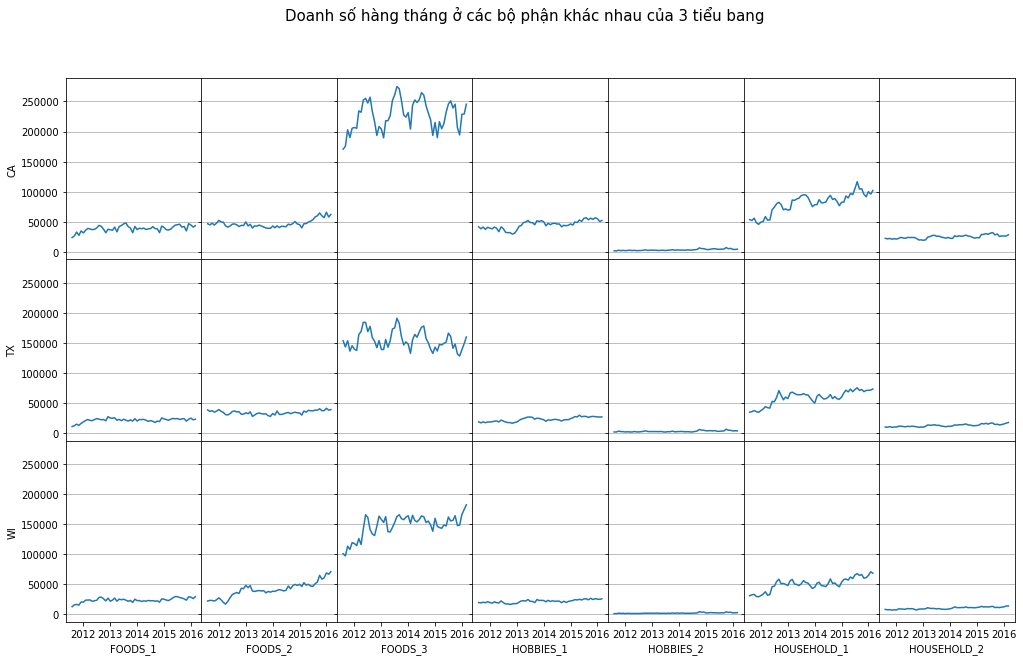

In [199]:
#Nhóm sale2_temp theo cột 'store_id', rồi tính tổng doanh số ở các cột từ cột đầu tiên và trừ 6 cột cuối
sale_state_dept = sale2_temp.groupby(['state_id','dept_id'])[(sale2_temp.columns)[6:]].sum()
#Lưới biểu đồ có 3 dòng 7 cột
fig, ax = plt.subplots(3, 7, sharey=True,sharex=True,figsize = (17,10))
#Vẽ biểu đồ
for i in range(3):
    for j in range(7):
        k = (7*i)+(j)
        ax[i,j].plot(sale_state_dept.iloc[k,1:-1])
        ax[i,j].grid(b=True,axis='y')
        xlabel = sale_state_dept.index[k][1]
        ylabel = sale_state_dept.index[k][0]
        ax[i,j].set(xlabel=xlabel, ylabel=ylabel)
for a in ax.flat:
   a.label_outer()
fig.subplots_adjust( hspace = 0.0,wspace=0.0)
plt.suptitle('Doanh số hàng tháng ở các bộ phận khác nhau của 3 tiểu bang', fontsize = 15)
plt.show()

**Tổng doanh số với dữ liệu giảm nhiễu (trừ ngày lễ lớn 25/12 hàng năm)**

In [200]:
#Xóa những cột có ngày 25/12 hàng năm
smoothSales = sale2.drop(labels=[datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)],axis=1)
smoothSales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [201]:
#Tính tổng ở mỗi cột từ cột thứ 6 trở đi
S = smoothSales.iloc[:,6:].sum()
S.head()
S.shape[0]

1908

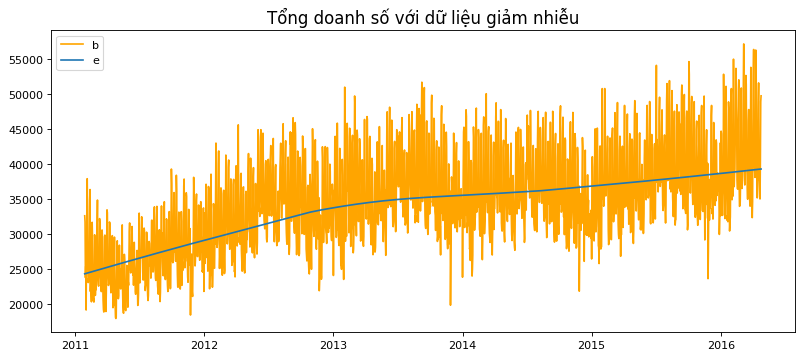

In [202]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
#Tính tổng ở mỗi cột từ cột thứ 6 trở đi
S = smoothSales.iloc[:,6:].sum()
z = lowess(S.values, range(S.shape[0]))
#Config size và màu của lưới biểu đồ
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ
plt.plot(S,color='orange')
plt.plot(pd.Series(z[:,1],S.index))
plt.title('Tổng doanh số với dữ liệu giảm nhiễu', fontsize = 15)
plt.legend('best')
plt.show()

**Dự đoán thặng dư theo mùa**

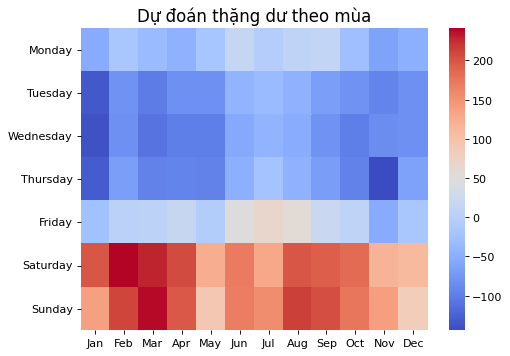

In [203]:
#Lấy giá trị từ cột thứ 6 trở đi, rồi tính tổng mỗi cột
S = smoothSales.iloc[:,6:].sum()
z = lowess(S.values, range(S.shape[0]))
M = S.values - z[:,1]
A = (pd.DataFrame(data=M,index=S.index)).T
A = A.groupby(A.columns.map(lambda x : str(x.weekday())+'-'+str(x.month)),axis=1).sum()

H = np.zeros((7,12))
#Lặp qua 7 ngày
for i in range(7):
  #Lặp qua 12 tháng
    for j in range(12):
        H[i,j] = A[str(i)+'-'+str(j+1)]//1000
        
#Vẽ biểu đồ
import seaborn as sns
#Config size và màu của lưới biểu đồ
plt.figure(None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday' ]
ax = sns.heatmap(H,cmap='coolwarm',xticklabels=xticklabels,yticklabels=yticklabels)
plt.title('Dự đoán thặng dư theo mùa', fontsize = 15)
plt.show()

**Doanh số ở mỗi tiểu bang theo mùa**

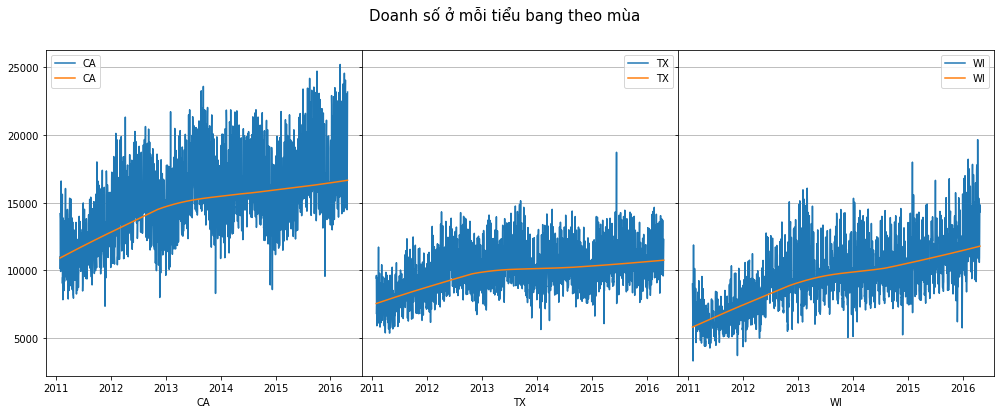

In [204]:
#Nhóm theo state_id, rồi tính tổng ở mỗi cột từ cột thứ 6 trở đi
S = smoothSales.groupby(['state_id'])[(smoothSales.columns)[6:]].sum()

#Config size của biểu đồ, lưới biểu đồ có 1 dòng và 3 cột
fig, ax = plt.subplots(1, 3, sharey=True, figsize = (17,6))
#Vẽ biểu đồ
for i in range(len(S.index)):
    ax[i].plot(S.iloc[i,:],label=S.index[i])
    z = lowess(S.iloc[i,:].values, range(S.shape[1]))
    ax[i].plot(pd.Series(z[:,1],S.columns),label=S.index[i] )
    ax[i].grid(b=True,axis='y')
    ax[i].set_xlabel(S.index[i])
    ax[i].legend(loc='best')

fig.subplots_adjust( wspace=0.0)
plt.suptitle('Doanh số ở mỗi tiểu bang theo mùa', fontsize = 15)
plt.show()

**Doanh số trung bình hàng tuần theo mùa**

In [205]:
#Lấy giá trị từ cột thứ 6 trở đi, tính trung bình tổng doanh thu
mean_sales = S.iloc[:,6:].sum().mean()
A = S
for i in range(len(S.index)):
    z = lowess(S.iloc[i,:].values, range(S.shape[1]))
    A.iloc[i,:] = S.iloc[i,:] - z[:,1]
A = A/mean_sales
A = A.groupby(A.columns.map(lambda x : str(x.weekday())),axis=1).sum()
A

,0,1,2,3,4,5,6
state_id,,,,,,,
CA,-1.404834,-11.256125,-13.919584,-13.529480,0.100727,27.460872,29.983385
TX,-0.683657,-7.627108,-8.106651,-7.559704,-0.637163,15.105139,18.778783
WI,-5.068407,-7.043198,-6.751147,-6.167255,5.129804,19.353920,10.620337


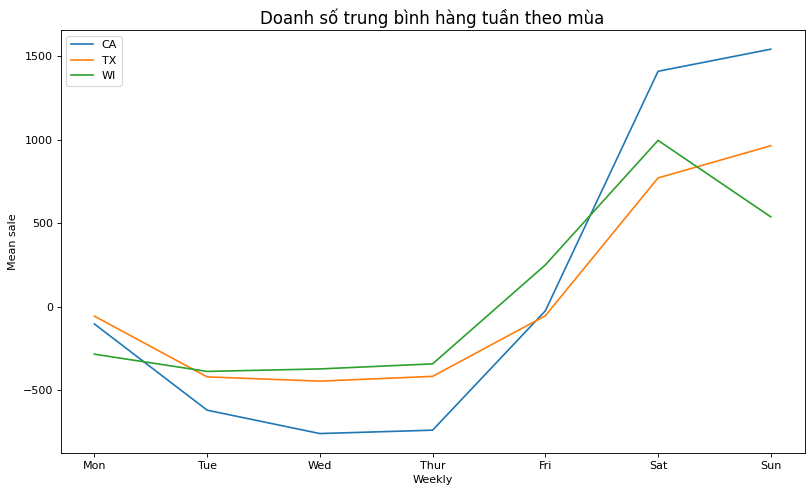

In [206]:
#Lấy giá trị từ cột thứ 6 trở đi, tính trung bình tổng doanh thu
mean_sales = S.iloc[:,6:].sum().mean()
A = S
for i in range(len(S.index)):
    z = lowess(S.iloc[i,:].values, range(S.shape[1]))
    A.iloc[i,:] = S.iloc[i,:] - z[:,1]
A = A/mean_sales
#Nhóm các cột theo ngày trong tuần và tính tổng doanh số mỗi ngày trong tuần
A = A.groupby(A.columns.map(lambda x : str(x.weekday())),axis=1).sum()
#Config size, màu của lưới biểu đồ
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    plt.plot(A.iloc[i,:],label=A.index[i])
    plt.xticks(range(0,7),['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun' ])
    plt.xlabel('Weekly')
    plt.ylabel('Mean sale')
    plt.title('Doanh số trung bình hàng tuần theo mùa', fontsize = 15)
    plt.legend(loc='best')

plt.show()

**Doanh số trung bình hàng tháng theo mùa**

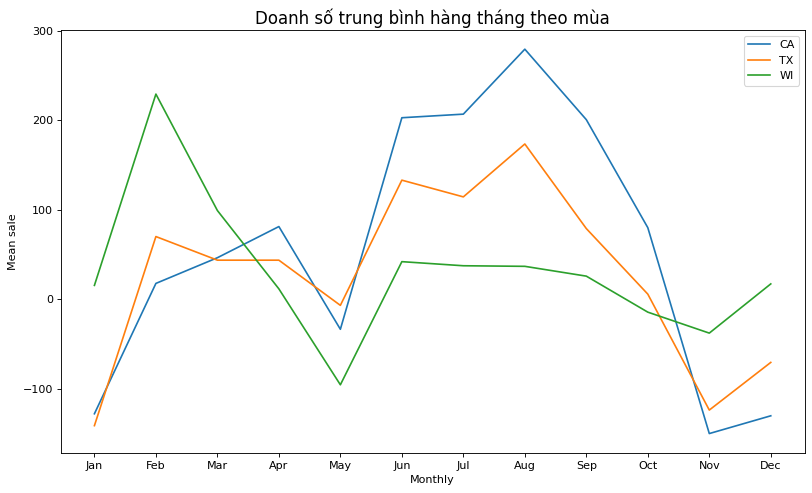

In [207]:
A = S
for i in range(len(S.index)):
    z = lowess(S.iloc[i,:].values, range(S.shape[1]))
    A.iloc[i,:] = S.iloc[i,:] - z[:,1]
A = A/mean_sales
#Nhóm các cột theo tháng và tính tổng doanh số mỗi tháng
A = A.groupby(A.columns.map(lambda x : (x.month)),axis=1).sum()
#Config size, màu của lưới biểu đồ
plt.figure(num=None, figsize=(12,7), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(S.index)):
    plt.plot(A.iloc[i,:],label=A.index[i])
    plt.xlabel('Monthly')
    plt.ylabel('Mean sale')
    plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(loc='best')
plt.title('Doanh số trung bình hàng tháng theo mùa', fontsize = 15)
plt.show()

**Doanh số trung bình hàng tuần và hàng tháng ở mỗi tiểu bang và danh mục**

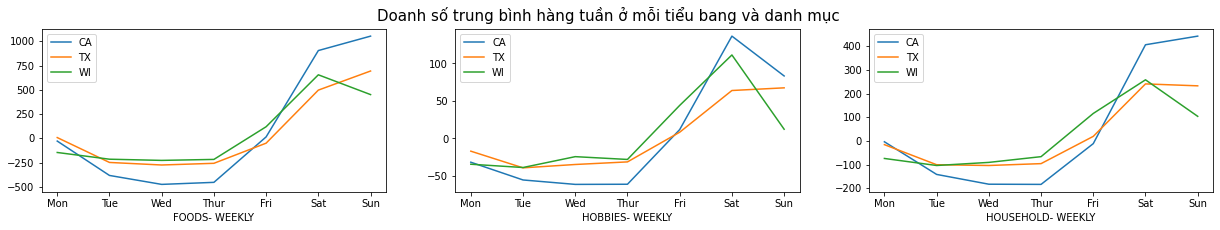

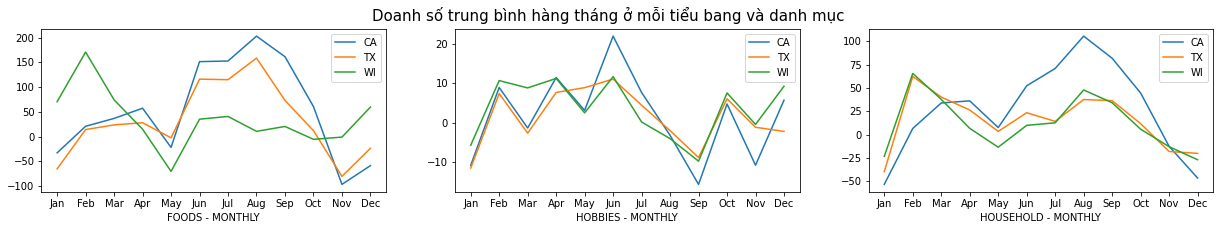

In [208]:
from matplotlib.mathtext import Fonts
#Nhóm theo cột cat_id và state_id, tính tổng giá trị mỗi cột từ cột thứ 6 trở đi
S = smoothSales.groupby(['cat_id','state_id'])[(smoothSales.columns)[6:]].sum()
A = S
for i in range(9):
    z = lowess(S.iloc[i,:].values, range(S.shape[1]))
    A.iloc[i,:] = S.iloc[i,:] - z[:,1]
G = A/mean_sales
#Nhóm các cột theo weekday, rồi tính tổng
A = G.groupby(G.columns.map(lambda x : str(x.weekday())),axis=1).sum()
#Config size và màu của lưới biểu đồ, lưới biểu đồ có 1 dòng 3 cột
fig, ax = plt.subplots(1,3,figsize = (21,3),sharex=True)
#Vẽ biểu đồ theo Weekly
for i in range(9):
    ax[(i//3)].plot(A.iloc[i,:],label=A.index[i][1])
    ax[(i//3)].legend(loc='best')
    ax[i//3].set(xlabel = A.index[i][0]+'- WEEKLY')
plt.xticks(range(0,7),['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun' ])
plt.suptitle('Doanh số trung bình hàng tuần ở mỗi tiểu bang và danh mục', fontsize = 15)
plt.show()

#Nhóm các cột theo month, rồi tính tổng
B = G.groupby(G.columns.map(lambda x : x.month),axis=1).sum()
#Config size và màu của lưới biểu đồ, lưới biểu đồ có 1 dòng 3 cột
fig, ax = plt.subplots(1,3,figsize = (21,3), sharex=True)
#Vẽ biểu đồ theo Monthly
for i in range(9):
    ax[(i//3)].plot(B.iloc[i,:],label=B.index[i][1])
    ax[(i//3)].legend(loc='best')
    ax[i//3].set(xlabel = B.index[i][0]+' - MONTHLY')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.suptitle('Doanh số trung bình hàng tháng ở mỗi tiểu bang và danh mục', fontsize = 15)
plt.show()

**Số ngày có sự kiện với ngày không có sự kiện**

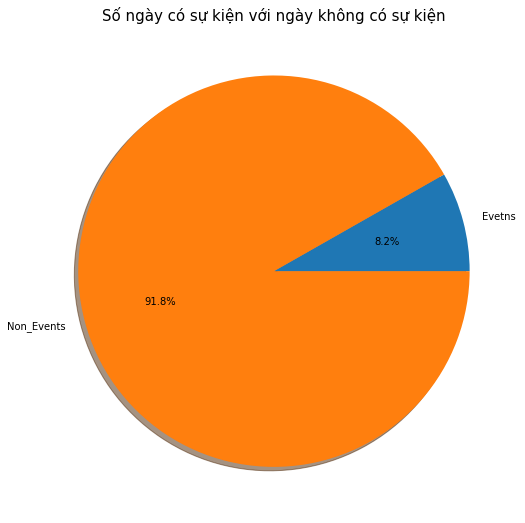

In [209]:
#Số ngày không có sự kiện = tổng số ngày - số ngày có sự kiện
Non_events = cale4.date.count() - cale4.event_name_1.count()
#Số ngày có sự kiện
Events = cale4.event_name_1.count()
labels = ['Evetns','Non_Events']
fracs = [Events, Non_events]

# Vẽ lưới biểu đồ
fig, axs = plt.subplots(1, 1, figsize=(9,9))
# Vẽ biểu đồ pie
axs.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)
axs.set_title('Số ngày có sự kiện với ngày không có sự kiện', fontsize = 15)
#pd.Series([Non_events,Events], ['Non_Events',"Evetns"],name="").plot.pie(autopct='%1.1f%%')
plt.show()

**Số ngày của mỗi loại sự kiện**

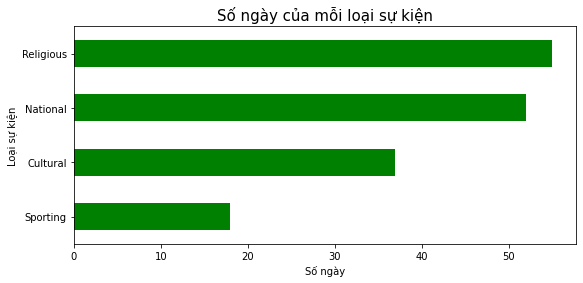

In [210]:
#Nhóm các ngày cùng loại sự kiện 'event_type_1' với nhau, sau đó xắp xếp tăng dần
F = cale4.groupby(['event_type_1']).count().iloc[:,1].sort_values(ascending=True)
#Vẽ biểu đồ barh 
fig, axs = plt.subplots(1, 1, figsize=(9,4))
F.plot.barh(color='green')
plt.xlabel('Số ngày')
plt.ylabel('Loại sự kiện')
plt.title('Số ngày của mỗi loại sự kiện', fontsize = 15)
plt.show()

**Số ngày SNA trong mỗi tháng của các tiểu bang khác nhau**

In [211]:
#Import các thư viện cần dùng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Khởi tạo các biến và set giá trị
years = [2016] 
weeks = [1, 2, 3, 4, 5, 6]
days = ['M', 'T', 'W', 'T', 'F', 'S', 'S']
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']

#Hàm generate_data
def generate_data():
    idx = pd.date_range('2016-01-01', periods=182, freq='D')
    return pd.Series(range(len(idx)), index=idx)


#Hàm split_months
def split_months(df, year):
    """
    Take a df, slice by year, and produce a list of months,
    where each month is a 2D array in the shape of the calendar
    :param df: dataframe or series
    :return: matrix for daily values and numerals
    """
    df = df[df.index.year == year]


    # Empty matrices
    a = np.empty((6, 7))
    a[:] = np.nan

    day_nums = {m:np.copy(a) for m in range(1,7)}  # matrix for day numbers
    day_vals = {m:np.copy(a) for m in range(1,7)}  # matrix for day values

    # Logic to shape datetimes to matrices in calendar layout
    for d in df.iteritems():  # use iterrows if you have a DataFrame

        day = d[0].day
        month = d[0].month
        col = d[0].dayofweek

        if d[0].is_month_start:
            row = 0

        day_nums[month][row, col] = day  # day number (0-31)
        day_vals[month][row, col] = d[1] # day value (the heatmap data)

        if col == 6:
            row += 1

    return day_nums, day_vals


#Hàm create_year_calendar thực hiện vẽ Calendar
def create_year_calendar(day_nums, day_vals, X, name):
    fig, ax = plt.subplots(1, 6, figsize=(20, 12))

    for i, axs in enumerate(ax.flat):

        axs.imshow(day_vals[i+1], cmap='viridis', vmin=1, vmax=365)  # heatmap
        axs.set_title(month_names[i])

        # Labels
        axs.set_xticks(np.arange(len(days)))
        axs.set_xticklabels(days, fontsize=10, fontweight='bold', color='#FFFFFF')
        axs.set_yticklabels([])

        # Tick marks
        axs.tick_params(axis=u'both', which=u'both', length=0)  # remove tick marks
        axs.xaxis.tick_top()

        # Modify tick locations for proper grid placement
        axs.set_xticks(np.arange(-.5, 6, 1), minor=True)
        axs.set_yticks(np.arange(-.5, 6, 1), minor=True)
        axs.grid(which='minor', color='w', linestyle='-', linewidth=2.1)

        # Despine
        for edge in ['left', 'right', 'bottom', 'top']:
            axs.spines[edge].set_color('white')

        # Annotate
        for w in range(len(weeks)):
            for d in range(len(days)):
                day_num = day_nums[i+1][w, d]
                if not np.isnan(day_num):    # Value label
                    axs.text(d, w, f"{day_num:0.0f}",
                             ha="center", va="center",
                             fontsize=15, color="k", alpha=0.8)
                    patch_coords = ((d - 0.5, w - 0.5),
                                    (d - 0.5, w + 0.5),
                                    (d + 0.5, w + 0.5),
                                    (d + 0.5, w - 0.5))
                    if datetime.datetime.strptime(str(years[0])+'-'+str(i+1)+'-'+str(int(day_num)), '%Y-%m-%d').date().strftime('%Y-%m-%d') in X:
                        square = Polygon(patch_coords, fc='gold')  #FF4500
                        axs.add_artist(square)
                    else:
                        square = Polygon(patch_coords, fc='#DDDDDD')
                        axs.add_artist(square)

    # Final adjustments
    fig.suptitle(name + ' 2016', fontsize=20)
    plt.subplots_adjust(left=0.04, right=0.96, top=1, bottom=0.65)
    plt.show()

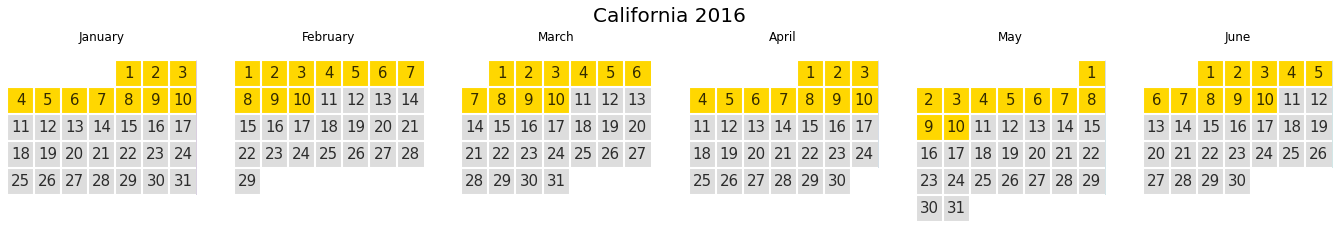

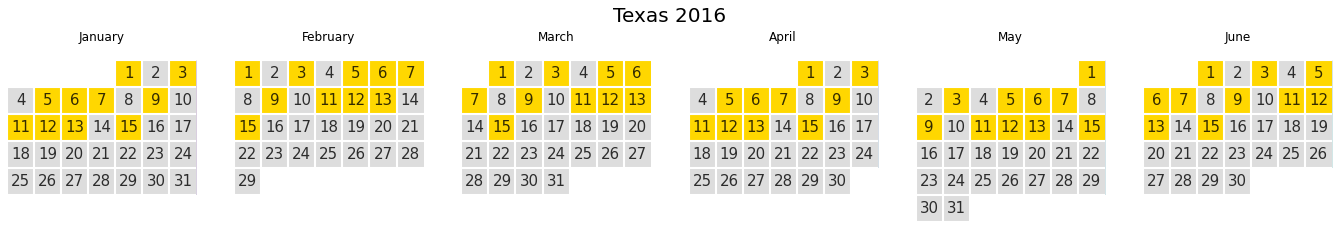

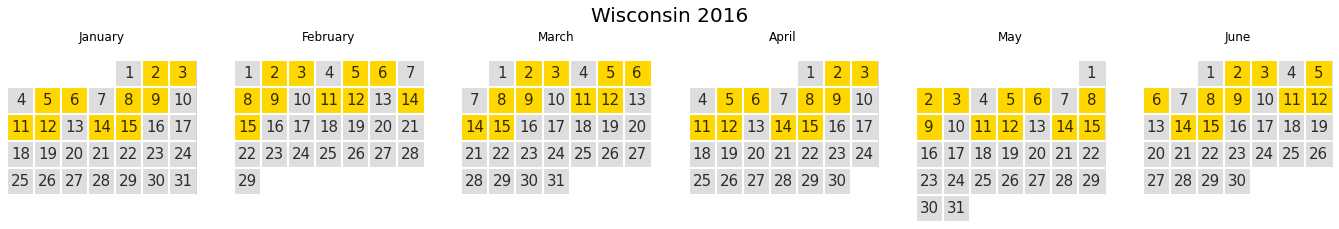

In [212]:
#Số ngày SNA của tiểu bảng California
CA = cale4.date[cale4.snap_CA == 1].values
#Số ngày SNA của tiểu bảng Texas
TX = cale4.date[cale4.snap_TX == 1].values
#Số ngày SNA của tiểu bảng Wisconsin
WI = cale4.date[cale4.snap_WI == 1].values
df = generate_data()
day_nums, day_vals = split_months(df,2016)
#Gọi hàm create_year_calendar với các tham số
create_year_calendar(day_nums, day_vals,CA,'California')
create_year_calendar(day_nums, day_vals,TX,'Texas')
create_year_calendar(day_nums, day_vals,WI,'Wisconsin')

**Giá các mặt hàng phân phối theo các bộ phận khác nhau của ba tiểu bang**

In [213]:
#In 5 dòng dữ liệu đầu tiên
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [214]:
#Dataframe prices được nhóm theo store_id
A=prices.groupby([prices.store_id.str.slice(0,-2),prices.item_id.str.slice(0,-4)])
#Tạo list B
B = []
for name, group in A:
    B.append(name)

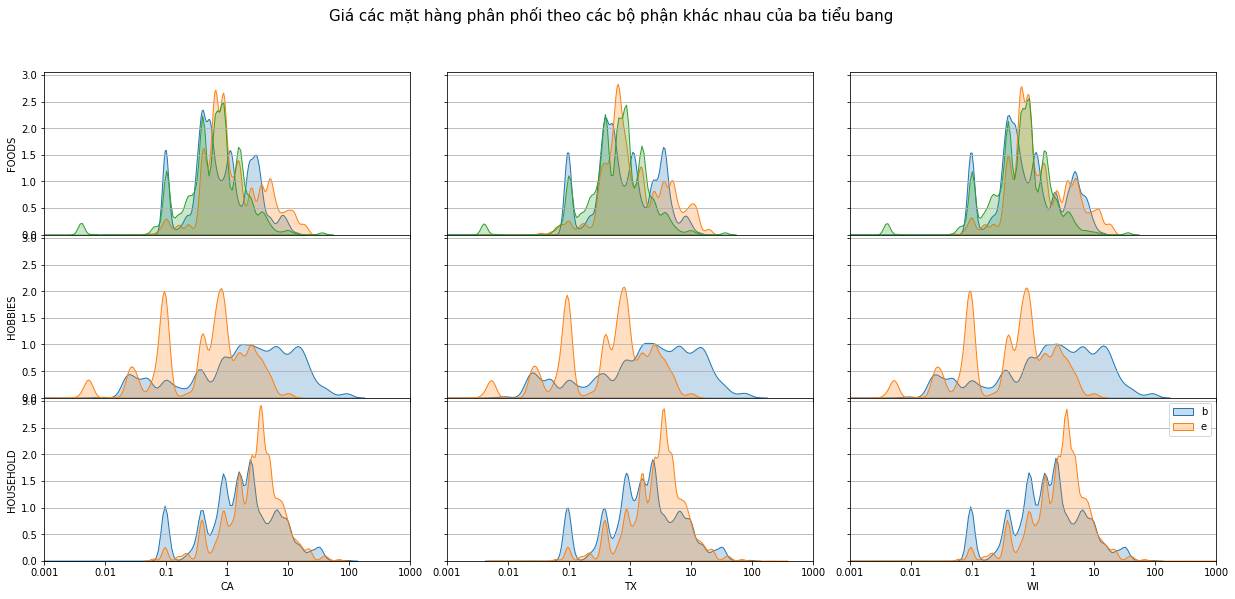

In [215]:
import seaborn as sns
#Vẽ lưới đồ thị có 3 dòng 3 cột và config size
fig, ax = plt.subplots(3,3,sharey=True,sharex=True, figsize=(21,9))
k=0
for j in range(3):
    for i in range(0,1):
        sns.kdeplot(np.log10(A.get_group(B[k])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+1])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+2])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else('TX' if j==1 else'WI'), ylabel ="FOODS")
    for i in range(1,2):
        sns.kdeplot(np.log10(A.get_group(B[k+3])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+4])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else('TX' if j==1 else'WI'),ylabel = "HOBBIES")
    for i in range(2,3):
        sns.kdeplot(np.log10(A.get_group(B[k+5])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+6])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else('TX' if j==1 else'WI'),ylabel ="HOUSEHOLD")
    k=k+7
fig.canvas.draw()
loc,labels = plt.xticks()
for ax in ax.flat:
    ax.label_outer()
    ax.set_xlim(-1,2)
    ax.set_xticklabels([10 ** int(i.get_text().replace(u'\u2212', '-')) for i in labels])
fig.subplots_adjust( hspace = 0.0,wspace=0.1)
plt.suptitle('Giá các mặt hàng phân phối theo các bộ phận khác nhau của ba tiểu bang', fontsize=15)
plt.legend('best')
plt.show()

**Giá phân phối hàng năm của các bộ phận khác nhau**

In [216]:
#Tính toán dữ liệu
A=prices.groupby([prices.item_id.str.slice(0,-4),prices.wm_yr_wk//100 + 1900])['sell_price']
n = []
for name,group in A:
    n.append(name)

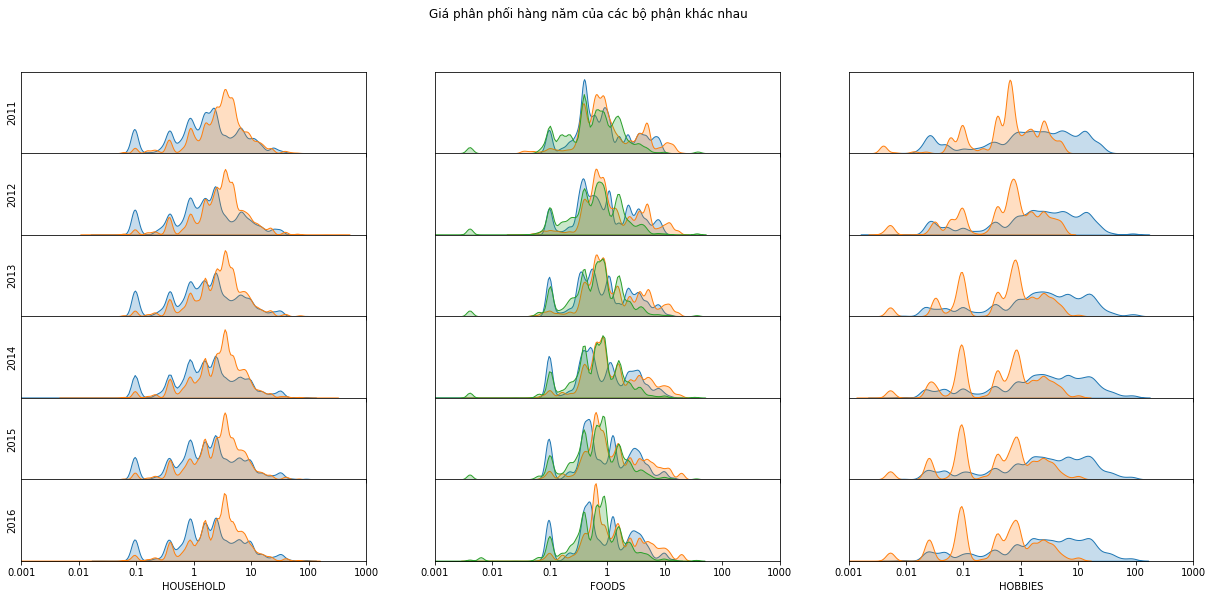

In [217]:
import seaborn as sns
#Vẽ lưới biểu đồ gôm 6 dòng 3 cột
fig, ax = plt.subplots(6,3,sharey=True,sharex=True, figsize=(21,9))
plt.suptitle('Giá phân phối hàng năm của các bộ phận khác nhau')
#Vẽ biểu đồ
for i in n:
    j = 0 if i[0][:-2]=='HOUSEHOLD' else (1 if i[0][:-2]=='FOODS' else 2)
    k = i[1] - 2011
    sns.kdeplot(np.log10(A.get_group(i)),legend=False,bw_method=0.1,shade=True,ax=ax[k,j])
    ax[k,j].set(xlabel = i[0][:-2], ylabel =k+2011)
fig.canvas.draw()
loc,labels = plt.xticks()
for ax in ax.flat:
    ax.label_outer()
    ax.set_xlim(-1,2)
    ax.set_xticklabels([10 ** int(i.get_text().replace(u'\u2212', '-')) for i in labels])
plt.yticks([], [])
fig.subplots_adjust( hspace = 0.0,wspace=0.2)
plt.show()

**Doanh số theo các danh mục trong suốt những ngày có sự kiện và ngày không có sự kiện**

In [218]:
#Tạo danh sách các ngày noel
noel = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
#Xóa những cột là ngày noel
F = sale2.drop(labels=noel,axis=1)
event_dates = cale4[pd.notnull(cale4['event_name_1'])]['date'] 
event_dates = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates.values]

#Remove những ngày noel
for i in noel:
    event_dates.remove(i)
#Tạo dataframe chứa những ngày có sự kiện    
event_sales = F[['id','dept_id','cat_id', 'store_id', 'state_id']+event_dates[:-8]]
#Tạo dataframe chứa những ngày không có sự kiện
nevent_sales = F[F.drop(columns=event_dates[:-8]).columns]

In [219]:
event_sales.head()

,id,dept_id,cat_id,store_id,state_id,2011-02-06,2011-02-14,2011-02-21,2011-03-09,2011-03-16,...,2016-01-07,2016-01-18,2016-02-07,2016-02-10,2016-02-14,2016-02-15,2016-02-17,2016-03-17,2016-03-24,2016-03-27
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,0,4,6,2,1,0,0,3,5,6
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2,0,0,2,2,2,1,0,0,0


In [220]:
#Khởi tạo các biến
N3 = []
L1 = []
L2 = []
L3 = []
means = []
#Nhóm theo cột 'cat_id', rồi tính tổng doanh số
e = event_sales.groupby(['cat_id']).sum()
ne = nevent_sales.groupby(['cat_id']).sum()
t = F.groupby(['cat_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n1 = lowess(e.iloc[i,:].values, range(e.shape[1]),frac=0.4)
    n2 = lowess(ne.iloc[i,:].values, range(ne.shape[1]),frac=0.4)
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.4)
    L1.append(n1[:,1])
    L2.append(n2[:,1])
    L3.append(n3[:,1])
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)
L1 = pd.DataFrame(L1,columns = e.columns)
L2 = pd.DataFrame(L2,columns = ne.columns)
L3 = pd.DataFrame(L3,columns = t.columns)

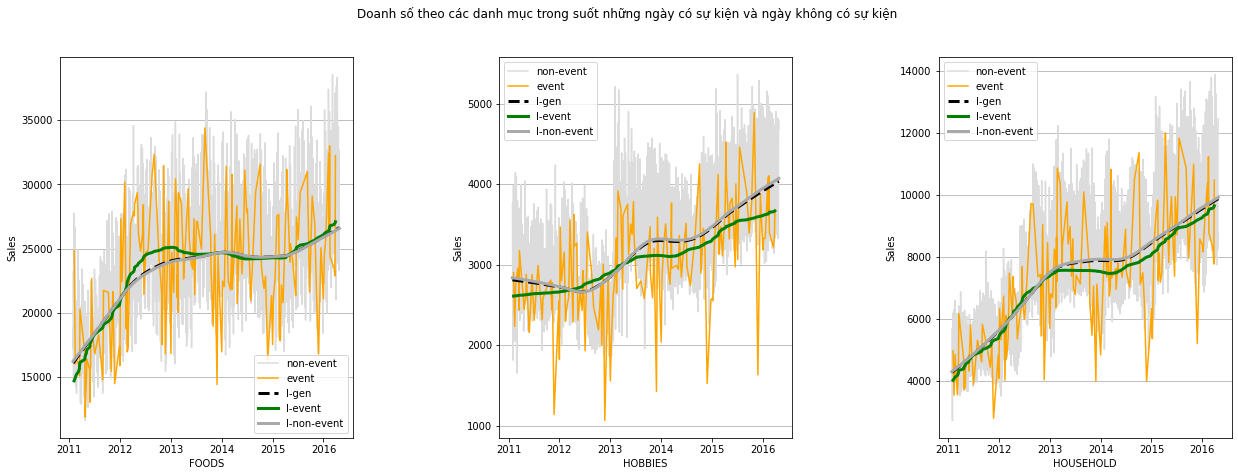

In [221]:
#Vẽ lưới biểu đồ gồm 1 dòng 3 cột và config size
fig, ax = plt.subplots(1,3, figsize=(21,7))
#Vẽ biểu đồ
for j in range(3):
    ax[j].plot(ne.iloc[j,:] ,color='gainsboro', label = 'non-event')
    ax[j].plot(e.iloc[j,:] ,color='orange',label = 'event') 
    ax[j].plot(L3.iloc[j,:] ,color = 'black', linestyle= 'dashed',label = 'l-gen',linewidth=3) 
    ax[j].plot(L1.iloc[j,:] ,color='green',label = 'l-event',linewidth=3)   
    ax[j].plot(L2.iloc[j,:] ,color = 'darkgray',label = 'l-non-event',linewidth=3) 
    ax[j].grid(b=True,axis='y')
    ax[j].legend(loc='best')
    ax[j].set(xlabel = t.index[j] ,ylabel = 'Sales')

fig.subplots_adjust( hspace = 0.0,wspace=0.5)
plt.suptitle('Doanh số theo các danh mục trong suốt những ngày có sự kiện và ngày không có sự kiện')
plt.show()

In [222]:
#Tính toán dữ liệu
N1 = N3[event_dates[:-8]].T.assign(Event='True')
N2 = N3[N3.drop(columns=event_dates[:-8]).columns].T.assign(Event='False')
cdf = pd.concat([N1,N2])
mdf = pd.melt(cdf, id_vars=['Event'], var_name=['Letter'])

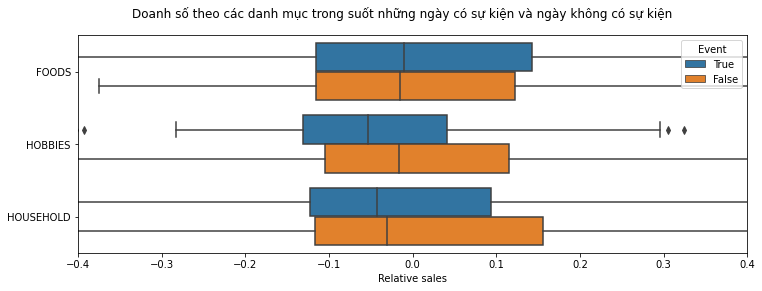

In [223]:
#Vẽ lưới biểu đồ gồm 1 dòng 1 cột và config size
fig, ax = plt.subplots(1,1, figsize=(12,4))
#Vẽ biểu đồ
ax = sns.boxplot(x="value", y="Letter", hue="Event", data=mdf, orient='h') 

ax.set(xlabel="Relative sales",ylabel='')
ax.set_xlim(-0.4, 0.4)
plt.suptitle('Doanh số theo các danh mục trong suốt những ngày có sự kiện và ngày không có sự kiện')
plt.show()

In [224]:
#Khởi tạo các biến
N3 = []
means = []
#Nhóm theo cột 'cat_id'
t = F.groupby(['cat_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.5)
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)

#List các ngày lễ noel các năm
c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
#Xóa những ngày lễ noel
F = sale2.drop(labels=c,axis=1)
event_dates = cale4[pd.notnull(cale4['event_name_1'])][['date','event_type_1']] 
event_dates['date'] = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates['date']]

for i in c:
    event_dates = event_dates[event_dates['date'] != i]


s = N3.T
s.reset_index(drop=False, inplace=True)
s.rename(columns = {'index':'date'},inplace=True)
s = pd.merge(left=event_dates, right=s, how='left', left_on='date', right_on='date')

s = s.groupby(['event_type_1']).median()
s.reset_index(drop=False, inplace=True)
s = s.melt(id_vars=['event_type_1'], value_vars=s.columns[1:])

Text(0.5, 1.0, 'Doanh số theo các danh mục trong suốt những ngày có sự kiện và ngày không có sự kiện')

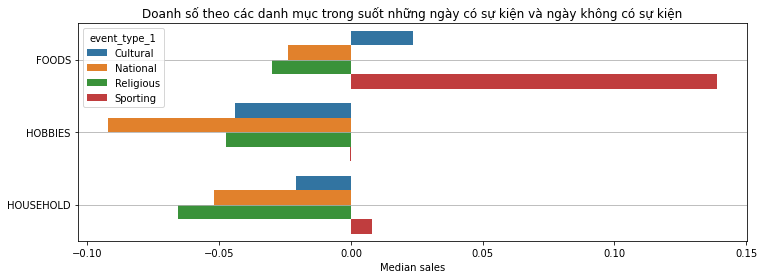

In [225]:
#Vẽ lưới biểu đồ gồm 1 dòng 1 cột và config size
fig, ax = plt.subplots(1,1, figsize=(12,4))
#Vẽ biểu đồ
ax=sns.barplot(x=s.value,y=s.variable,hue=s.event_type_1)
ax.grid(b=True,axis='y')
ax.set(xlabel="Median sales",ylabel='')
ax.set_title('Doanh số theo các danh mục trong suốt những ngày có sự kiện và ngày không có sự kiện')

**Doanh số ở từng tiểu bang những ngày SNAP vs những ngày Non-SNAP**

In [226]:
#List những ngày lễ noel
c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
#Xóa những ngày lễ noel
F = sale2.drop(labels=c,axis=1)
#Nhóm theo cột 'state_id', rồi tính tổng doanh số
F = F.groupby(['state_id']).sum()
#Tính toán dữ liệu
CA_snap = cale4.date[cale4.snap_CA == 1].values
TX_snap = cale4.date[cale4.snap_TX == 1].values
WI_snap = cale4.date[cale4.snap_WI == 1].values
CA_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in CA_snap]
TX_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in TX_snap]
WI_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in WI_snap]

CA_snap_sales = F[CA_snap[:-20]].iloc[0,:]
TX_snap_sales = F[TX_snap[:-20]].iloc[1,:]
WI_snap_sales = F[WI_snap[:-20]].iloc[2,:]

CA_nsnap_sales = F[F.drop(columns=CA_snap[:-20]).columns].iloc[0,:]
TX_nsnap_sales = F[F.drop(columns=TX_snap[:-20]).columns].iloc[1,:]
WI_nsnap_sales = F[F.drop(columns=WI_snap[:-20]).columns].iloc[2,:]

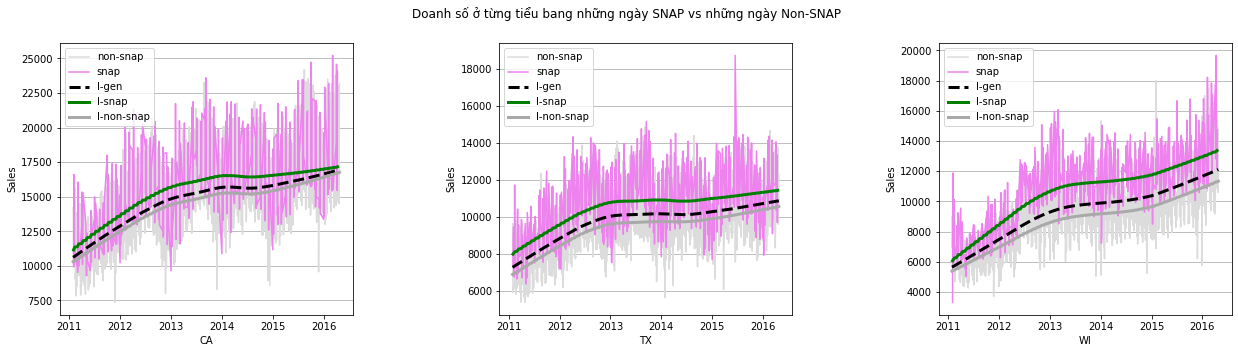

In [227]:
#Khởi tạo các biến
N3 = []
L1 = []
L2 = []
L3 = []
means = []
e = [CA_snap_sales,TX_snap_sales,WI_snap_sales]
ne = [CA_nsnap_sales,TX_nsnap_sales,WI_nsnap_sales]
t = F
means = t.mean(axis=1)
for i in range(3):
    n1 = lowess(e[i].values, range(len(e[i])),frac=0.5)
    n2 = lowess(ne[i].values, range(len(ne[i])),frac=0.5)
    nn3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.5)
    n1 = pd.Series(n1[:,1],e[i].index)
    n2 = pd.Series(n2[:,1],ne[i].index)
    n3 = pd.Series(nn3[:,1],t.columns)
    L1.append(n1)
    L2.append(n2)
    L3.append(n3)
    n3 = (t.iloc[i,:] - nn3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)
#Vẽ lưới biểu đồ có 1 dòng 3 cột
fig, ax = plt.subplots(1,3, figsize=(21,5))
for j in range(3):
    ax[j].plot(ne[j] ,color='gainsboro', label = 'non-snap')
    ax[j].plot(e[j],color='violet',label = 'snap') 
    ax[j].plot(L3[j] ,color = 'black', linestyle= 'dashed',label = 'l-gen',linewidth=3) 
    ax[j].plot(L1[j] ,color='green',label = 'l-snap',linewidth=3)   
    ax[j].plot(L2[j] ,color = 'darkgray',label = 'l-non-snap',linewidth=3) 
    ax[j].grid(b=True,axis='y')
    ax[j].legend(loc='best')
    ax[j].set(xlabel = t.index[j] ,ylabel = 'Sales')

fig.subplots_adjust( hspace = 0.0,wspace=0.5)
plt.suptitle('Doanh số ở từng tiểu bang những ngày SNAP vs những ngày Non-SNAP')
plt.show()

**% doanh số hàng ngày của những ngày SNAP so với những ngày Non-SNAP**

In [228]:
#Tính toán dữ liệu
perc = []
for i in range(3):
    a = e[i].sum()/(1908/3)
    b = ne[i].sum()/(2*1908/3)
    perc.append([a*100/(a+b), b*100/(a+b)])

perc = pd.DataFrame(perc,index=["CA","TX","WI"],columns=["SNAP","NON_SNAP"])
perc.reset_index(drop=False, inplace=True)
s = perc.melt(id_vars=['index'], value_vars=perc.columns[1:])
s = s.sort_values(by='index',ignore_index=True)

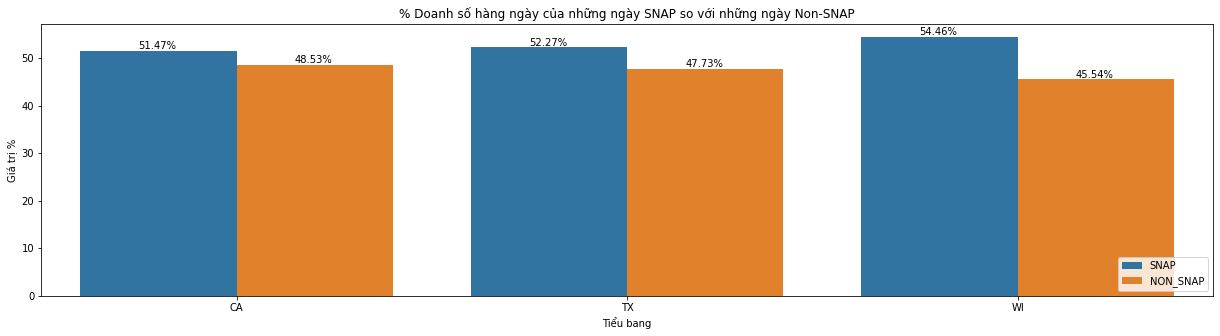

In [229]:
#Vẽ biểu đồ
fig, ax = plt.subplots(1,1, figsize=(21,5))
ax = sns.barplot(y=s.value,hue=s.variable,x=s['index'])
ax.legend(loc = 'lower right')
ax.set_title('% Doanh số hàng ngày của những ngày SNAP so với những ngày Non-SNAP')
ax.set_xlabel('Tiểu bang')
ax.set_ylabel('Giá trị %')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height()+'%', xy=(p.get_x()+p.get_width()/2,p.get_height()),
            xytext=(-20,5), textcoords='offset points', ha="left", va="center")

**% Doanh số hàng ngày những ngày SNAP vs những ngày Non-SNAP theo danh mục**

In [230]:
#Nhóm theo các cột 'state_id','cat_id', sau đó tính tổng doanh số
F  = sale2.groupby(['state_id','cat_id']).sum()
#Reset index
F.reset_index(drop=False, inplace=True)
l = [CA_snap[:-20],TX_snap[:-20],WI_snap[:-20]]
#Tính toán dữ liệu
t = []
for i in range(9):
    t.append((F['state_id'][i],F['cat_id'][i]))
    
a=[]
b = []
perc = []
for i in range(9):
    a.append(F[l[i//3]].loc[i,:].sum()/(1908/3))
    b.append(F[F.drop(columns=l[i//3]).columns].iloc[i,3:].sum()/(2*1908/3))
    perc.append([a[i]*100/(a[i]+b[i]), b[i]*100/(a[i]+b[i])])
perc = pd.DataFrame(perc,index=t,columns=["SNAP","NON_SNAP"])
perc.reset_index(drop=False, inplace=True)
s = perc.melt(id_vars=['index'], value_vars=perc.columns[1:])
s = s.sort_values(by='index',ignore_index=True)

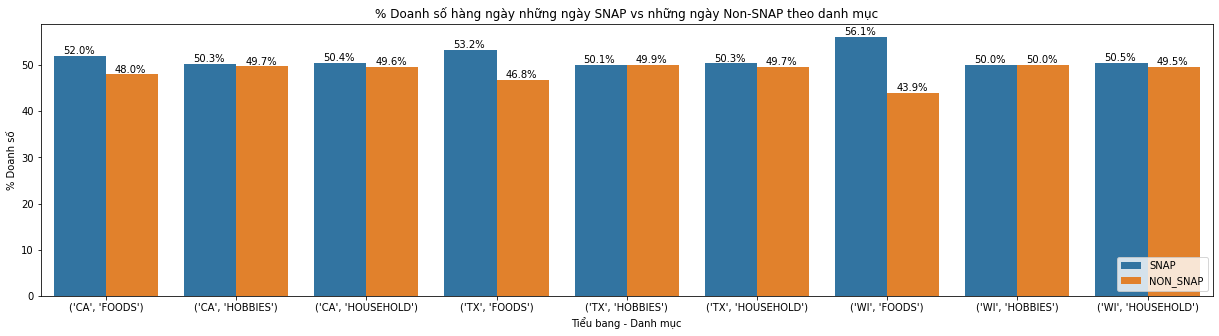

In [231]:
#Vẽ lưới biểu đồ
fig, ax = plt.subplots(figsize=(21,5))
#Vẽ biểu đồ
ax = sns.barplot(y=s.value,hue=s.variable,x=s['index'])
ax.set_xlabel('Tiểu bang - Danh mục')
ax.set_ylabel('% Doanh số')
ax.set_title('% Doanh số hàng ngày những ngày SNAP vs những ngày Non-SNAP theo danh mục')
ax.legend(loc = 'lower right')

for p in ax.patches:
    ax.annotate("%.1f" % p.get_height()+'%', xy=(p.get_x()+p.get_width()/2,p.get_height()),
            xytext=(-17,5), textcoords='offset points', ha="left", va="center")

**Những ngày SNAP ảnh hưởng trên doánh số của danh mục Food ở CA**

In [232]:
#Xóa những ngày lễ noel
z = F.drop(labels=c,axis=1).iloc[0,2:]
#Tính toán dữ liệu
n1 = lowess(z.values, range(1908),frac=0.5)
rel_sales = (z.values - n1[:,1]) / z.mean()
rel_sales = pd.Series(rel_sales,z.index)

rel_sales1 = rel_sales[CA_snap[:-20]]
rel_sales2 = rel_sales.drop(labels = CA_snap[:-20])

a = rel_sales1.groupby(rel_sales1.index.map(lambda x : str(x.weekday())+'-'+str(x.month))).sum()
b = rel_sales2.groupby(rel_sales2.index.map(lambda x : str(x.weekday())+'-'+str(x.month))).sum()

H = np.zeros((7,12))
for i in range(7):
    for j in range(12):
        H[i,j] = a[str(i)+'-'+str(j+1)] - b[str(i)+'-'+str(j+1)]

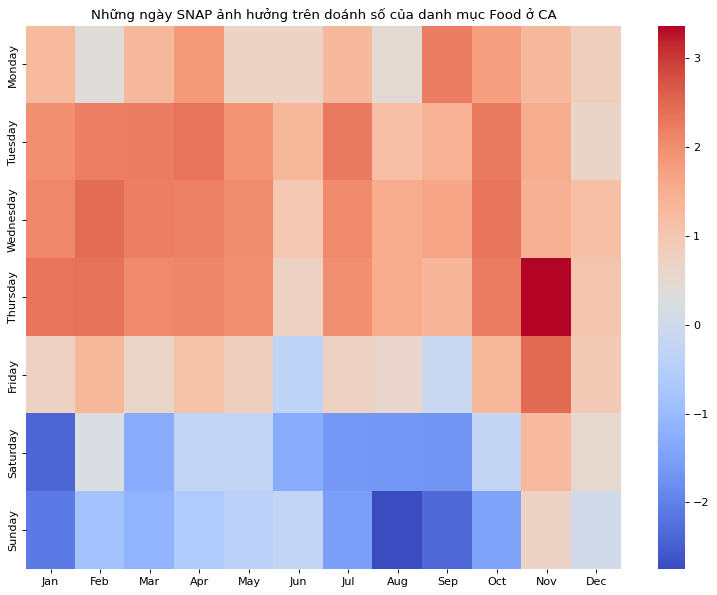

In [233]:
import seaborn as sns
#Config size, color cho biểu đồ
plt.figure(None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ
ax = sns.heatmap(H,cmap='coolwarm',xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],yticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday' ])
plt.title('Những ngày SNAP ảnh hưởng trên doánh số của danh mục Food ở CA')
plt.show()

**Doanh số của 3 mặt hàng ngẫu nhiên trong giữa năm 2015 với những điểm đỏ là ngày lễ và nền màu be là những ngày SNAP**


In [234]:
#Lấy dữ liệu từ 1/5/2016 đến 1/10/2015 của 3 mặt hàng ngẫu nhiên
x = sale2[sale2['id'].isin(["FOODS_2_092_CA_1_validation", "HOUSEHOLD_2_071_TX_2_validation", "HOBBIES_1_348_WI_3_validation"])].loc[:,datetime.date(2013,5,1):datetime.date(2013,10,1)]

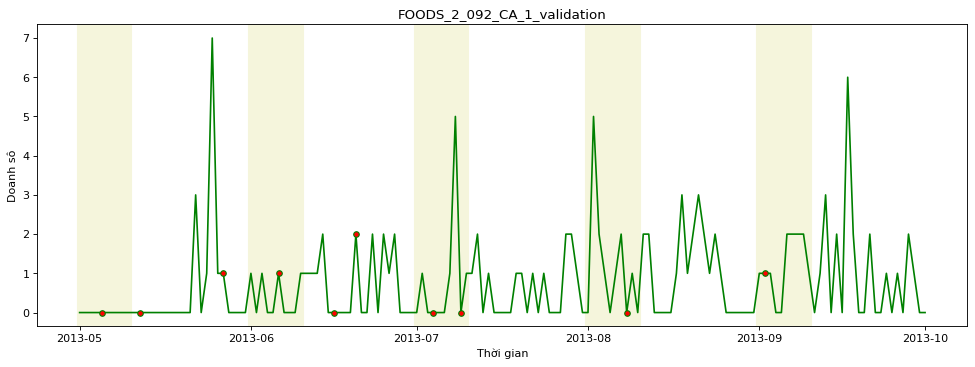

In [235]:
#Tính toán dữ liệu
v = event_dates[event_dates['date'].isin([datetime.date(2013,5,1) + datetime.timedelta(days=x) for x in range(153)])]['date']
d = []
for i in range(len(v)):
    d.append(x.columns.get_loc(v.values[i]))   
c = list(set(CA_snap) & set([datetime.date(2013,5,1) + datetime.timedelta(days=x) for x in range(153)]))
e = []
for i in range(len(c)):
    e.append(x.columns.get_loc(c[i]))
    
#Config size, màu của biểu đồ
plt.figure(None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ
for i in range(len(c)):
    plt.axvline(c[i],color='beige',linewidth=5.5)
plt.plot(x.iloc[0,:], '-gd', markevery = d,markerfacecolor='red',marker='.',markersize=10)
plt.title("FOODS_2_092_CA_1_validation")
plt.xlabel("Thời gian")
plt.ylabel("Doanh sô")
plt.show()

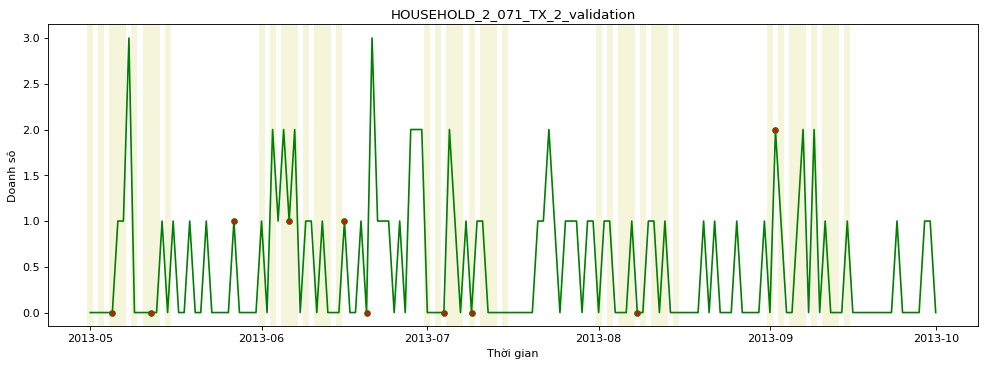

In [236]:

#Tính toán dữ liệu
v = event_dates[event_dates['date'].isin([datetime.date(2013,5,1) + datetime.timedelta(days=x) for x in range(153)])]['date']
d = []
for i in range(len(v)):
    d.append(x.columns.get_loc(v.values[i]))   
c = list(set(TX_snap) & set([datetime.date(2013,5,1) + datetime.timedelta(days=x) for x in range(153)]))
e = []
for i in range(len(c)):
    e.append(x.columns.get_loc(c[i]))
    
#Config size, màu của biểu đồ
plt.figure(None, figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ
for i in range(len(c)):
    plt.axvline(c[i],color='beige',linewidth=5.5)
plt.plot(x.iloc[1,:], '-gd', markevery = d,markerfacecolor='red',marker='.',markersize=10)
plt.title("HOUSEHOLD_2_071_TX_2_validation")
plt.xlabel("Thời gian")
plt.ylabel("Doanh sô")
plt.show()

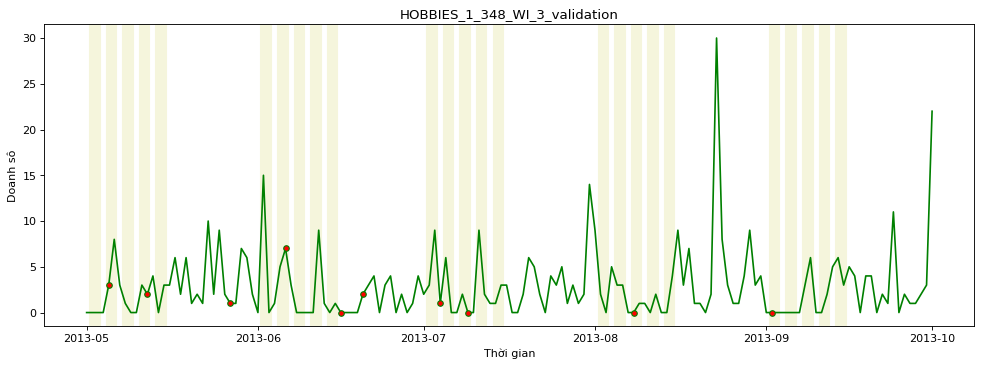

In [237]:
#Tính toán dữ liệu
v = event_dates[event_dates['date'].isin([datetime.date(2013,5,1) + datetime.timedelta(days=x) for x in range(153)])]['date']
d = []
for i in range(len(v)):
    d.append(x.columns.get_loc(v.values[i]))   
c = list(set(WI_snap) & set([datetime.date(2013,5,1) + datetime.timedelta(days=x) for x in range(153)]))
e = []
for i in range(len(c)):
    e.append(x.columns.get_loc(c[i]))
    
#Config size, màu của biểu đồ
plt.figure(None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ
for i in range(len(c)):
    plt.axvline(c[i],color='beige',linewidth=5.5)
plt.plot(x.iloc[2,:], '-gd', markevery = d, markerfacecolor='red',marker='.',markersize=10)
plt.title("HOBBIES_1_348_WI_3_validation")
plt.xlabel("Thời gian")
plt.ylabel("Doanh sô")
plt.show()

**Doanh số của 3 mặt hàng ngẫu nhiên với giá thay đổi trên nền màu đen**

In [238]:
#Lấy dữ liệu từ cột thứ 6 trở đi của 3 items
import matplotlib
x = sale2[sale2['id'].isin(["FOODS_2_092_CA_1_validation", "HOUSEHOLD_2_071_TX_2_validation", "HOBBIES_1_348_WI_3_validation"])].iloc[:,6:]

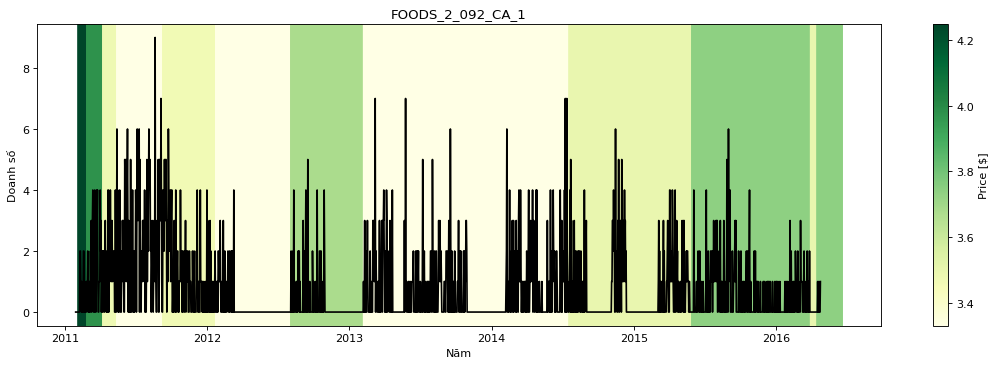

In [239]:
#Tính toán dữ liệu
z = prices[(prices['store_id']=='CA_1') & (prices['item_id']=='FOODS_2_092')]
z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
u = z.sell_price.unique()
y = []
u = u[1:]
for i in u:
    y.append(z.groupby(['sell_price']).get_group(i)['date'].values)
#Config size, màu của lưới biểu đồ    
plt.figure(None, figsize=(17, 5), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ
for i in range(len(y)):
    for j in range(len(y[i])):
        plt.axvline(y[i][j],color=matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()), cmap='YlGn').to_rgba(u[i]))
plt.plot(x.iloc[0,:],color='black')
plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()), cmap='YlGn'),label='Price [$]')
plt.title("FOODS_2_092_CA_1")
plt.xlabel("Năm")
plt.ylabel("Doanh số")
plt.show()

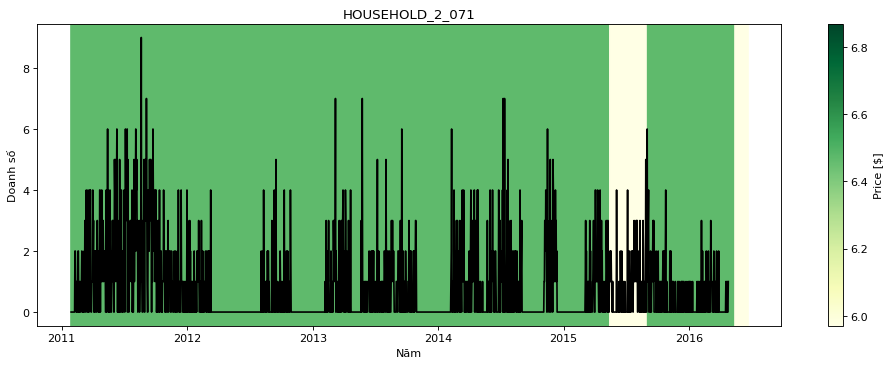

In [240]:
#Tính toán dữ liệu
z = prices[(prices['store_id']=='TX_2') & (prices['item_id']=='HOUSEHOLD_2_071')]
z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
u = z.sell_price.unique()
y = []
for i in u:
    y.append(z.groupby(['sell_price']).get_group(i)['date'].values)
#Config size, màu của lưới biểu đồ    
plt.figure(None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ
for i in range(len(y)):
    for j in range(len(y[i])):
        plt.axvline(y[i][j],color=matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.4), cmap='YlGn').to_rgba(u[i]))
plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.4), cmap='YlGn'),label='Price [$]')
plt.plot(x.iloc[0,:],color='black')
plt.title("HOUSEHOLD_2_071")
plt.xlabel("Năm")
plt.ylabel("Doanh số")
plt.show()

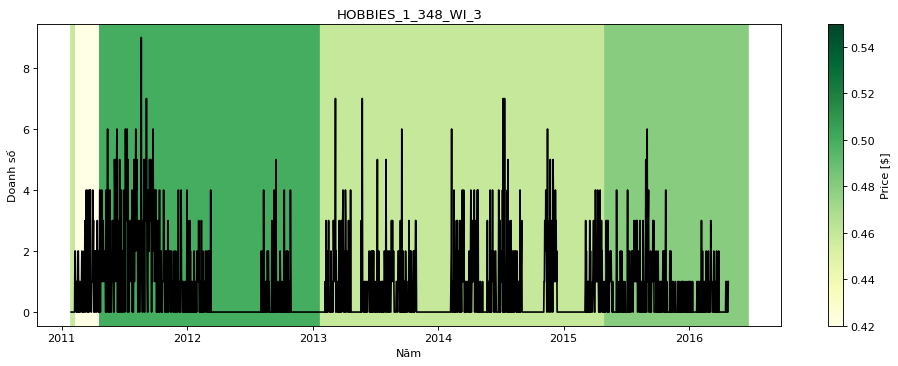

In [241]:
#Tính toán dữ liệu
z = prices[(prices['store_id']=='WI_3') & (prices['item_id']=='HOBBIES_1_348')]
z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
u = z.sell_price.unique()
y = []
for i in u:
    y.append(z.groupby(['sell_price']).get_group(i)['date'].values)

#Config size, màu của lưới biểu đồ  
plt.figure(None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ
for i in range(len(y)):
    for j in range(len(y[i])):
        plt.axvline(y[i][j],color=matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.05), cmap='YlGn').to_rgba(u[i]))
plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.05), cmap='YlGn'),label='Price [$]')
plt.plot(x.iloc[0,:],color='black')
plt.title("HOBBIES_1_348_WI_3")
plt.xlabel("Năm")
plt.ylabel("Doanh số")
plt.show()

**Doanh số của 3 mặt hàng với nên Xám đại diện những ngày SNAP, điểm đỏ đại diện có sự kiện và đường tím đại diện scaled prices**


In [242]:
#Lấy dữ liệu từ cột thứ 6 trở đi của 3 items
x = sale2[sale2['id'].isin(["FOODS_2_092_CA_1_validation", "HOUSEHOLD_2_071_TX_2_validation", "HOBBIES_1_348_WI_3_validation"])].iloc[:,6:]

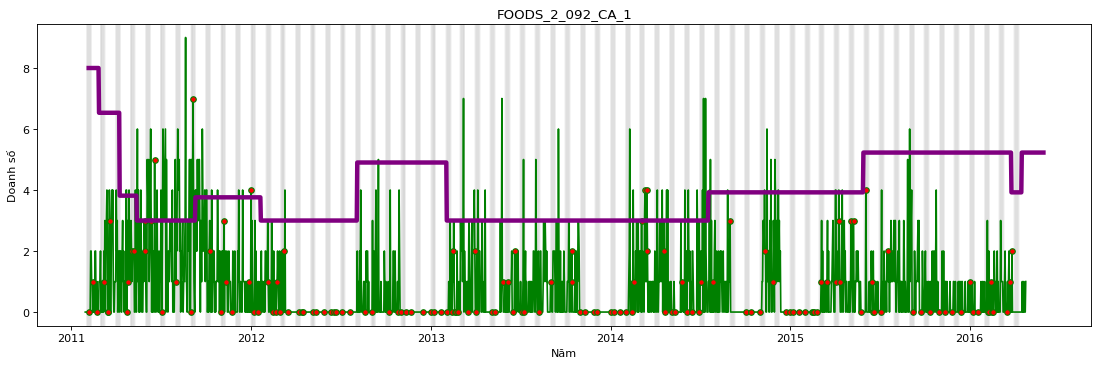

In [243]:
#Tính toán dữ liệu
v = event_dates['date']
index_drop = [1918, 1919,1923,1926,1948,1951,1956,1968]
v = v.drop(index = index_drop)
d = []
for i in range(len(v)):
    d.append(x.columns.get_loc(v.values[i]))   
c = CA_snap[:-20]
e = []
for i in range(len(c)):
    e.append(x.columns.get_loc(c[i]))
    
z = prices[(prices['store_id']=='CA_1') & (prices['item_id']=='FOODS_2_092')]
z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
z['sell_price'] = z['sell_price'].apply(lambda x : (((x - z.sell_price.min()) * (8-3)) / (z.sell_price.max() - z.sell_price.min())) + 3)
z = z.iloc[:-20,:]
z = z.set_index('date')

#Confgi size, màu cả lưới biểu đồ
plt.figure(None, figsize=(17, 5), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ
for i in range(len(c)):
    plt.axvline(c[i],color='dimgray',linewidth=0.1)
plt.plot(x.iloc[0,:], '-gd', markevery = d, markerfacecolor='red',marker='.',markersize=10)
plt.plot(z.sell_price,color='purple',linewidth=4)
plt.title("FOODS_2_092_CA_1")
plt.xlabel("Năm")
plt.ylabel("Doanh số")
plt.show()

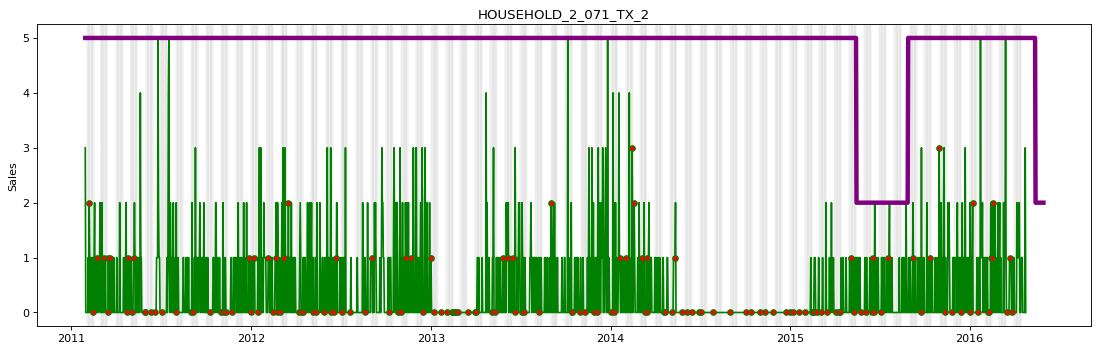

In [244]:
#Tính toán dữ liệu
v = event_dates['date']
index_drop = [1918, 1919,1923,1926,1948,1951,1956,1968]
v = v.drop(index = index_drop)
d = []
for i in range(len(v)):
    d.append(x.columns.get_loc(v.values[i]))   
c = TX_snap[:-20]
e = []
for i in range(len(c)):
    e.append(x.columns.get_loc(c[i]))
    
z = prices[(prices['store_id']=='TX_2') & (prices['item_id']=='HOUSEHOLD_2_071')]
z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
z['sell_price'] = z['sell_price'].apply(lambda x : (((x - z.sell_price.min()) * (5-2)) / (z.sell_price.max() - z.sell_price.min())) + 2)
z = z.iloc[:-20,:]
z = z.set_index('date')

#Confgi size, màu cả lưới biểu đồ
plt.figure(None, figsize=(17, 5), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ
for i in range(len(c)):
    plt.axvline(c[i],color='dimgray',linewidth=0.1)
plt.plot(x.iloc[1,:], '-gd', markevery = d, markerfacecolor='red',marker='.',markersize=10)
plt.plot(z.sell_price,color='purple',linewidth=4)
plt.title("HOUSEHOLD_2_071_TX_2")
plt.ylabel("Sales")
plt.show()

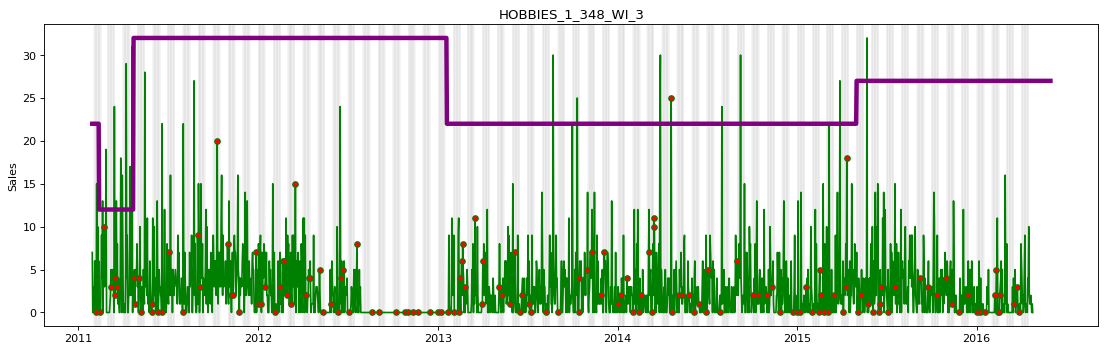

In [245]:
#Tính toán dữ liệu
v = event_dates['date']
index_drop = [1918, 1919,1923,1926,1948,1951,1956,1968]
v = v.drop(index = index_drop)
d = []
for i in range(len(v)):
    d.append(x.columns.get_loc(v.values[i]))   
c = WI_snap[:-20]
e = []
for i in range(len(c)):
    e.append(x.columns.get_loc(c[i]))
    
z = prices[(prices['store_id']=='WI_3') & (prices['item_id']=='HOBBIES_1_348')]
z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
z['sell_price'] = z['sell_price'].apply(lambda x : (((x - z.sell_price.min()) * (32-12)) / (z.sell_price.max() - z.sell_price.min())) + 12)
z = z.iloc[:-20,:]
z = z.set_index('date')

#Confgi size, màu cả lưới biểu đồ
plt.figure(None, figsize=(17, 5), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ
for i in range(len(c)):
    plt.axvline(c[i],color='dimgray',linewidth=0.1)
plt.plot(x.iloc[2,:], '-gd', markevery = d, markerfacecolor='red',marker='.',markersize=10)
plt.plot(z.sell_price,color='purple',linewidth=4)
plt.title("HOBBIES_1_348_WI_3")
plt.ylabel("Sales")
plt.show()